In [2]:
import pandas as pd

# Load the dataset
file_path =("C:\\Users\\sathe\\OneDrive\\Desktop\\MAJOR PROJECT\\global-data-on-sustainable-energy (1).csv")
df= pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head(3))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fo

In [3]:
df.shape

(3649, 21)

In [4]:
# Check for missing values in all columns
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_

In [5]:
df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].mean(), inplace=True)
cols_moderate_missing = [
    'Electricity from fossil fuels (TWh)', 
    'Electricity from renewables (TWh)', 
    'Low-carbon electricity (% electricity)'
]



In [6]:
print(df[['Year', 
          'Primary energy consumption per capita (kWh/person)', 
          'Access to electricity (% of population)', 
          'Electricity from fossil fuels (TWh)', 
          'Electricity from renewables (TWh)', 
          'Low-carbon electricity (% electricity)', 
          ]].isnull().sum())

Year                                                   0
Primary energy consumption per capita (kWh/person)     0
Access to electricity (% of population)                0
Electricity from fossil fuels (TWh)                   21
Electricity from renewables (TWh)                     21
Low-carbon electricity (% electricity)                42
dtype: int64


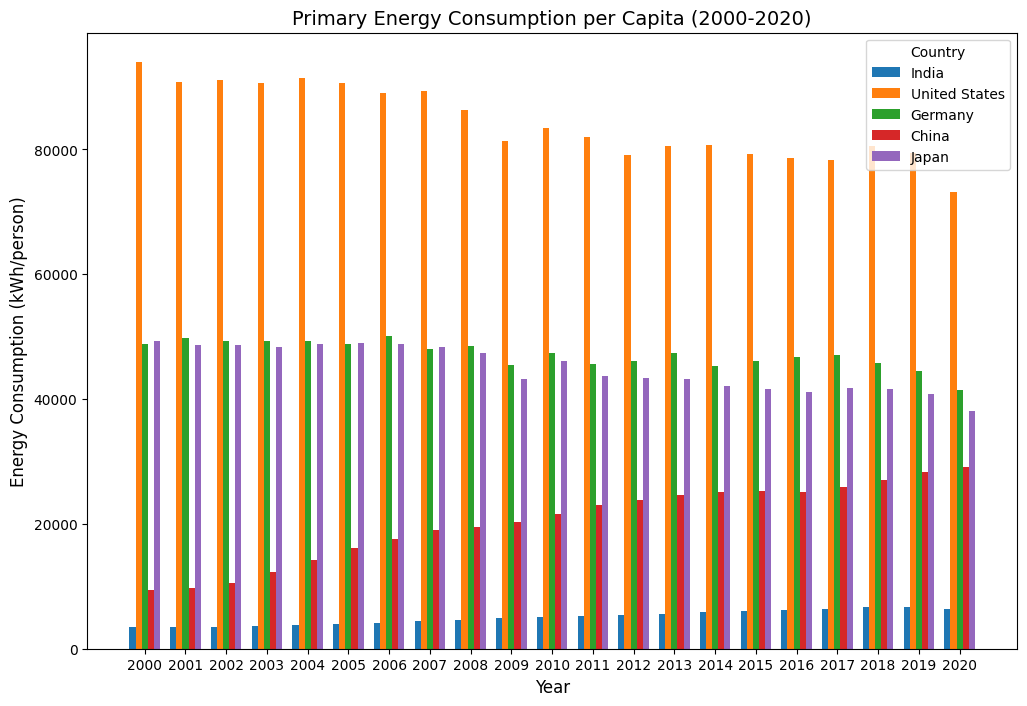

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Filter for the selected countries: India, United States, Germany, China, Japan
countries = ['India', 'United States', 'Germany', 'China', 'Japan']
filtered_data = df[df['Entity'].isin(countries)]

# Filter for years 2000-2020
filtered_data = filtered_data[(filtered_data['Year'] >= 2000) & (filtered_data['Year'] <= 2020)]

# Check for missing values and handle them (e.g., drop or interpolate)
filtered_data = filtered_data.dropna(subset=['Primary energy consumption per capita (kWh/person)'])

# Set the width of each bar
bar_width = 0.15

# Set positions for each country
years = sorted(filtered_data['Year'].unique())
x_pos = np.arange(len(years))

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Loop through each country and create a bar for each year
for i, country in enumerate(countries):
    country_data = filtered_data[filtered_data['Entity'] == country]
    plt.bar(x_pos + i * bar_width, 
            country_data.groupby('Year')['Primary energy consumption per capita (kWh/person)'].mean(), 
            width=bar_width, label=country)

# Add title and labels
plt.title('Primary Energy Consumption per Capita (2000-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Consumption (kWh/person)', fontsize=12)

# Set x-axis ticks to every 5 years
plt.xticks(x_pos + bar_width * 2, years)

# Add a legend to identify each country
plt.legend(title='Country')

# Display the plot
plt.show()



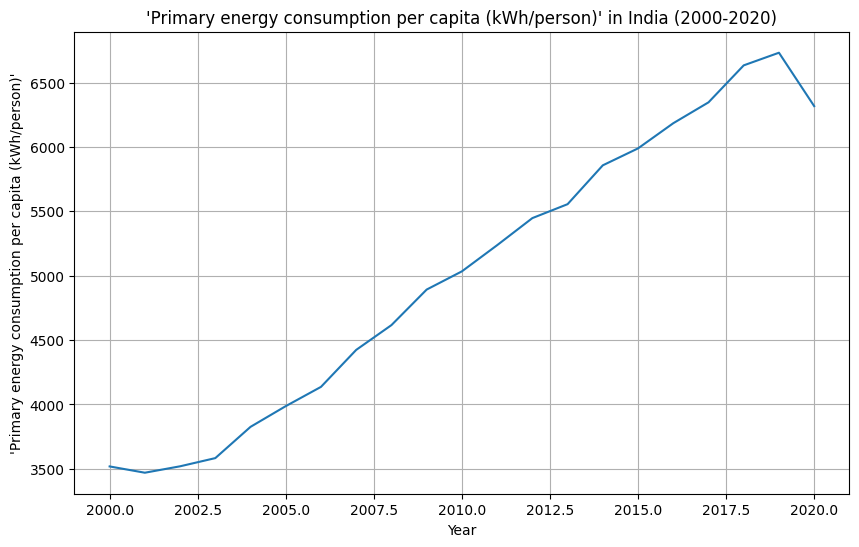

In [8]:
# Filter data for India
india_data = df[df['Entity'] == 'India']

# Select relevant columns, particularly 'Year' and 'Transformed Energy Consumption'
india_data = india_data[['Year', 'Primary energy consumption per capita (kWh/person)']]

# Set 'Year' as the index
india_data = india_data.set_index('Year')

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(india_data['Primary energy consumption per capita (kWh/person)'])
plt.title("'Primary energy consumption per capita (kWh/person)' in India (2000-2020)")
plt.xlabel("Year")
plt.ylabel("'Primary energy consumption per capita (kWh/person)'")
plt.grid(True)
plt.show()


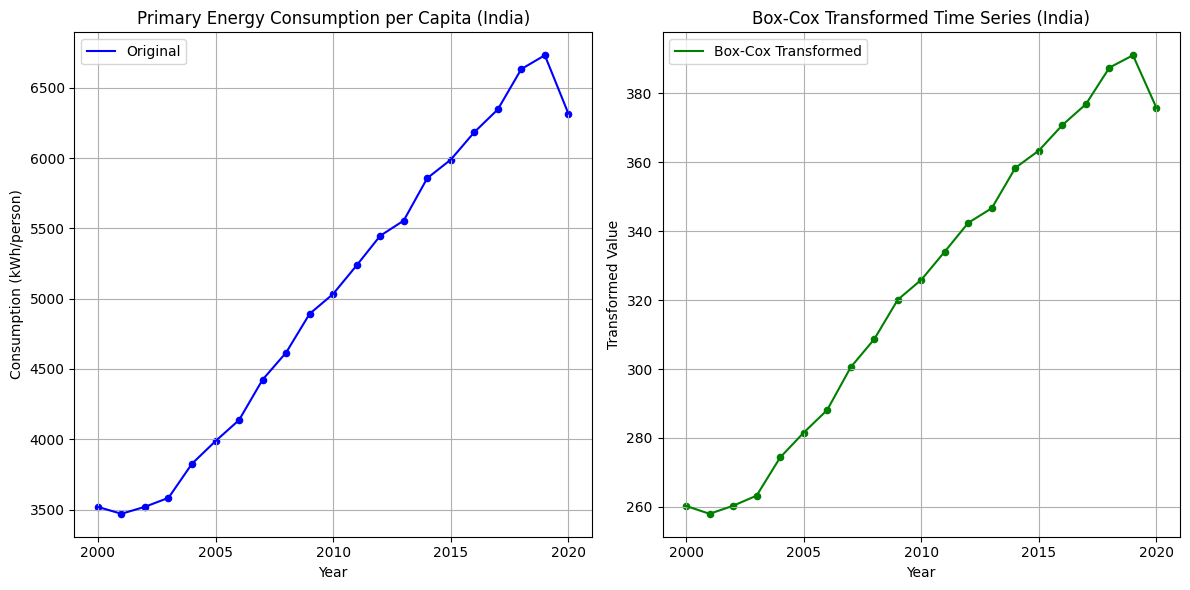

Optimal Box-Cox Lambda: 0.624102073815297


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Filter data for India
india_data = df[df['Entity'] == 'India']

# Select relevant columns
india_data = india_data[['Year', 'Primary energy consumption per capita (kWh/person)']]

# Set 'Year' as the index
india_data = india_data.set_index('Year')

# Apply Box-Cox transformation (adding a small constant to avoid issues with zero values)
transformed_data, lambda_value = boxcox(india_data['Primary energy consumption per capita (kWh/person)'] + 1)

# Define x-axis range for consistency
years = india_data.index

# Plot the original and Box-Cox transformed series
plt.figure(figsize=(12, 6))

# Original time series plot
plt.subplot(1, 2, 1)
plt.plot(years, india_data['Primary energy consumption per capita (kWh/person)'], linestyle="-", color="b", label="Original")
plt.scatter(years, india_data['Primary energy consumption per capita (kWh/person)'], color="b", s=20)  # Dots in the same color as the line
plt.title("Primary Energy Consumption per Capita (India)")
plt.xlabel("Year")
plt.ylabel("Consumption (kWh/person)")
plt.xticks(years[::5])  # Show every 5th year
plt.grid(True)
plt.legend()

# Box-Cox transformed time series plot
plt.subplot(1, 2, 2)
plt.plot(years, transformed_data, linestyle="-", color="green", label="Box-Cox Transformed")
plt.scatter(years, transformed_data, color="green", s=20)  # Dots in the same color as the line
plt.title("Box-Cox Transformed Time Series (India)")
plt.xlabel("Year")
plt.ylabel("Transformed Value")
plt.xticks(years[::5])  # Ensure same x-axis ticks
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print the Box-Cox lambda value
print(f"Optimal Box-Cox Lambda: {lambda_value}")



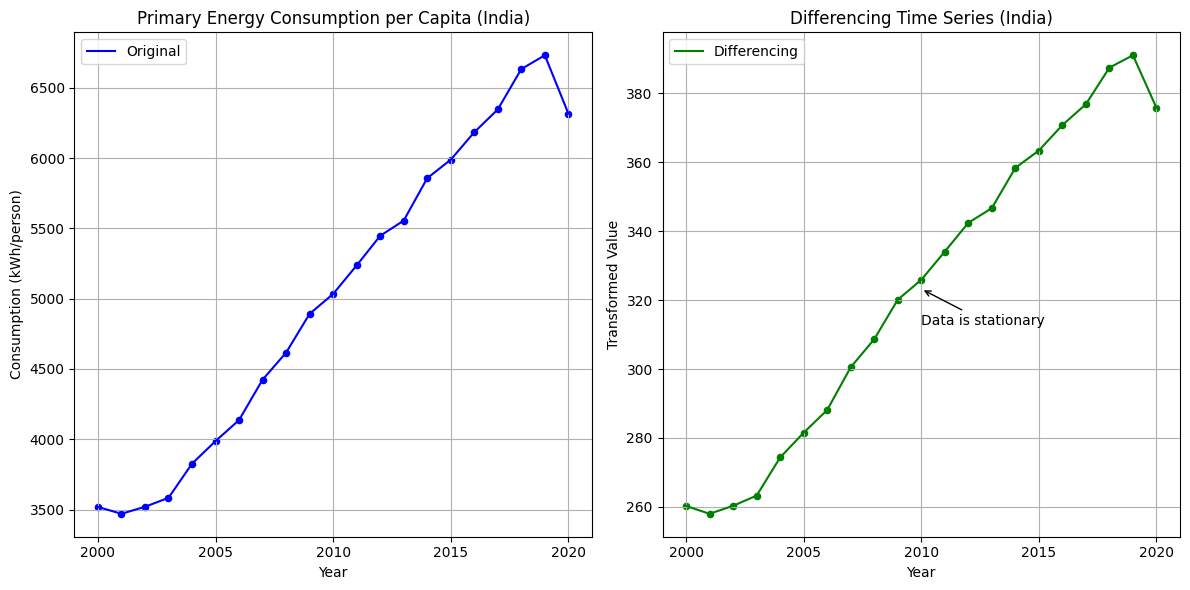

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Filter data for India
india_data = df[df['Entity'] == 'India']

# Select relevant columns
india_data = india_data[['Year', 'Primary energy consumption per capita (kWh/person)']]

# Set 'Year' as the index
india_data = india_data.set_index('Year')

# Apply Box-Cox transformation (adding 1 to avoid log(0) issues)
transformed_data, lambda_value = boxcox(india_data['Primary energy consumption per capita (kWh/person)'] + 1)

# Define x-axis range for consistency
years = india_data.index

# Plot the original and Differencing (Box-Cox transformed) series
plt.figure(figsize=(12, 6))

# Original time series plot
plt.subplot(1, 2, 1)
plt.plot(years, india_data['Primary energy consumption per capita (kWh/person)'], linestyle="-", color="b", label="Original")
plt.scatter(years, india_data['Primary energy consumption per capita (kWh/person)'], color="b", s=20)  # Dots in blue
plt.title("Primary Energy Consumption per Capita (India)")
plt.xlabel("Year")
plt.ylabel("Consumption (kWh/person)")
plt.xticks(years[::5])  # Show every 5th year
plt.grid(True)
plt.legend()

# Differencing (Box-Cox transformed) time series plot
plt.subplot(1, 2, 2)
plt.plot(years, transformed_data, linestyle="-", color="green", label="Differencing")
plt.scatter(years, transformed_data, color="green", s=20)  # Dots in green
plt.title("Differencing Time Series (India)")
plt.xlabel("Year")
plt.ylabel("Transformed Value")
plt.xticks(years[::5])  # Ensure same x-axis ticks
plt.grid(True)
plt.legend()

# Add annotation stating "Data is stationary"
plt.annotate("Data is stationary", 
             xy=(years[len(years)//2], np.mean(transformed_data)), 
             xytext=(years[len(years)//2], np.max(transformed_data)*0.8),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)

plt.tight_layout()
plt.show()



Selected ARIMA Order (p, d, q): (0, 1, 0)
MAE: 157.8204
MSE: 55343.9441
RMSE: 235.2529
MAPE: 2.46% (Lower is better, ideally below 10%)
MASE: 0.6560 (Good if below 1, lower values indicate better accuracy)

Predicted Values (2021-2025):
2021: 6153.51 kWh/person
2022: 6318.18 kWh/person
2023: 6482.86 kWh/person
2024: 6647.53 kWh/person
2025: 6812.21 kWh/person


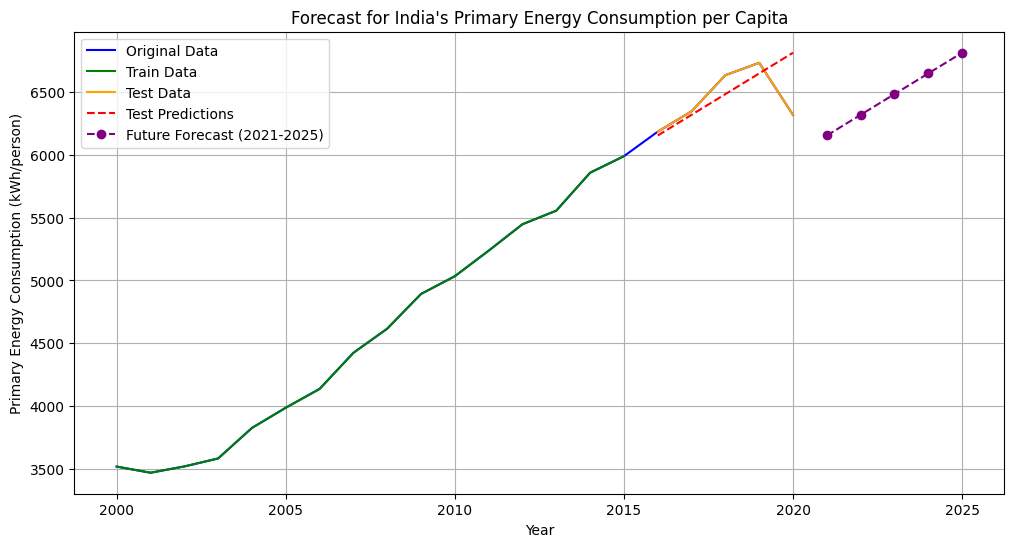

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Filter data for India
india_data = df[df['Entity'] == 'India'][['Year', 'Primary energy consumption per capita (kWh/person)']]
india_data = india_data.set_index('Year')

# Train-test split (80% train, 20% test)
train_size = int(len(india_data) * 0.8)
train, test = india_data.iloc[:train_size], india_data.iloc[train_size:]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Train Auto ARIMA model
model = pm.auto_arima(train_scaled, seasonal=False, stepwise=True, suppress_warnings=True)

# Print selected (p, d, q) values
print(f"Selected ARIMA Order (p, d, q): {model.order}")

# Forecast on test data
test_pred_scaled = model.predict(n_periods=len(test))
test_pred = scaler.inverse_transform(test_pred_scaled.reshape(-1, 1))

# Forecast for 2021-2025
future_years = np.arange(2021, 2026)
future_pred_scaled = model.predict(n_periods=len(future_years))
future_pred = scaler.inverse_transform(future_pred_scaled.reshape(-1, 1))

# Accuracy metrics
mae = mean_absolute_error(test, test_pred)
mse = mean_squared_error(test, test_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test.values - test_pred) / test.values)) * 100

# Mean Absolute Scaled Error (MASE)
naive_forecast = test.shift(1).dropna()  # Naïve method (previous value as prediction)
mae_naive = mean_absolute_error(naive_forecast, test.iloc[1:])  # MAE of naïve method
mase = mae / mae_naive

# Print accuracy metrics
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}% (Lower is better, ideally below 10%)")
print(f"MASE: {mase:.4f} (Good if below 1, lower values indicate better accuracy)")


# Print predicted values for 2021-2025
print("\nPredicted Values (2021-2025):")
for year, value in zip(future_years, future_pred.flatten()):
    print(f"{year}: {value:.2f} kWh/person")

# Plot Original, Test Predictions, and Future Forecast
plt.figure(figsize=(12, 6))

# Plot Original Data
plt.plot(india_data.index, india_data['Primary energy consumption per capita (kWh/person)'], label="Original Data", color='blue')

# Plot Train Data
plt.plot(train.index, train, color='green', label="Train Data")

# Plot Test Data
plt.plot(test.index, test, color='orange', label="Test Data")

# Plot Test Predictions
plt.plot(test.index, test_pred, color='red', linestyle='dashed', label="Test Predictions")

# Plot Future Predictions (2021-2025)
plt.plot(future_years, future_pred, color='purple', linestyle='dashed', marker='o', label="Future Forecast (2021-2025)")

# Formatting
plt.xlabel("Year")
plt.ylabel("Primary Energy Consumption (kWh/person)")
plt.xticks(list(india_data.index[::5]) + [2025])  # Show every 5 years + 2025
plt.title("Forecast for India's Primary Energy Consumption per Capita")
plt.legend()
plt.grid(True)
plt.show()
